<a href="https://colab.research.google.com/github/14marcos1/Geral01/blob/main/ELT574_Atividade_de_programa%C3%A7%C3%A3o_51687_10x10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinando um Agente para Atravesar um Labirinto
___
## Objetivo
Implementar e treinar um agente usando aprendizado por reforço para encontrar a saída de um labirinto simples. A atividade reforça conceitos como estados, ações, recompensas, e o uso do algoritmo Q-Learning.
___

## Descrição do Problema
O labirinto é uma grade 5x5, onde:
- Cada célula representa um estado.
- O agente começa em uma posição inicial fixa e deve chegar à saída.
- Obstáculos estão espalhados pelo labirinto, tornando algumas células inacessíveis.

O objetivo do agente é aprender a sequência ideal de movimentos para alcançar a saída, evitando obstáculos.
As recompensas são:
- +10: Quando o agente chega à célula de saída.
- -1: Para cada movimento em uma célula válida.
- -10: Quando o agente tenta atravessar uma célula com obstáculo ou sair dos limites do labirinto.
___

## Especificações
1. Estados: Cada célula do labirinto representa um estado (x,y).
2. Ações: O agente pode se mover para **cima**, **baixo**, **esquerda**, ou **direita**.
3. Ambiente:
- Labirinto definido como uma matriz 5x5, onde:
  - 0: Célula acessível.
  - -1: Obstáculo.
  - 9: Saída.
___
## Passos da Atividade
1. Definir o Ambiente
  
  Implementar a lógica do labirinto e a interação do agente com o ambiente.

2. Implementar o Algoritmo Q-Learning

  Configurar a tabela Q(s,a) e o processo de treinamento.

3. Avaliar o Agente

  Analisar como o agente aprendeu a explorar o ambiente e encontrar a saída.
___

O código abaixo está implementado para ser utilizado nesta atividade. Tente compreender o que foi feito nele e faça o que se pede.

In [1]:
# Bibliotecas

import numpy as np
import random
import matplotlib.pyplot as plt

In [8]:
# Definição do ambiente (10x10 com o máximo de obstáculos, mantendo um caminho válido)

class Labirinto:
    def __init__(self):
        self.labirinto = np.array([
    [ 0,  0, -1, -1,  0, -1, -1, -1, -1, -1],
    [-1,  0,  0, -1,  0,  0, -1, -1, -1, -1],
    [-1, -1,  0, -1, -1,  0,  0, -1, -1, -1],
    [-1, -1,  0,  0, -1, -1,  0,  0, -1, -1],
    [-1, -1, -1,  0, -1, -1, -1,  0,  0, -1],
    [-1, -1, -1,  0,  0, -1, -1, -1,  0, -1],
    [-1, -1, -1, -1,  0,  0, -1, -1,  0, -1],
    [-1, -1, -1, -1, -1,  0,  0, -1,  0, -1],
    [-1, -1, -1, -1, -1, -1,  0,  0,  0, -1],
    [-1, -1, -1, -1, -1, -1, -1, -1,  0,  9]
])

        self.estado_inicial = (0, 0)
        self.saida = (9, 9)
        self.acoes = ['cima', 'baixo', 'esquerda', 'direita']

    def reset(self):
        return self.estado_inicial

    def step(self, estado, acao):
        x, y = estado
        if acao == 'cima':
            x -= 1
        elif acao == 'baixo':
            x += 1
        elif acao == 'esquerda':
            y -= 1
        elif acao == 'direita':
            y += 1

        # Verifica os limites
        if x < 0 or x >= self.labirinto.shape[0] or y < 0 or y >= self.labirinto.shape[1]:
            return estado, -10, False  # Movimento inválido

        novo_estado = (x, y)
        if self.labirinto[x, y] == -1:
            return estado, -10, False  # Obstáculo

        if novo_estado == self.saida:
            return novo_estado, 10, True  # Encontrou a saída

        return novo_estado, -1, False  # Movimento válido


In [14]:
# Algoritmo Q-Learning com coleta de métricas

def q_learning(env, episodios, alpha=1.0, gamma=0.9, epsilon=1.0):
    q_table = np.zeros((10, 10, len(env.acoes)))  # Inicializa Q(s, a)
    metrics = {'episodio': [], 'retorno': [], 'passos': []}

    for ep in range(1, episodios + 1):
        estado = env.reset()
        done = False
        total_recompensa = 0
        passos = 0


        while not done:
            # Escolha da ação
            if random.uniform(0, 1) < epsilon:
                acao = random.choice(range(len(env.acoes)))
            else:
                acao = np.argmax(q_table[estado[0], estado[1]])

            # Realiza a ação
            novo_estado, recompensa, done = env.step(estado, env.acoes[acao])

            # Atualiza Q(s, a)
            q_table[estado[0], estado[1], acao] = \
                (1 - alpha) * q_table[estado[0], estado[1], acao] + \
                alpha * (recompensa + gamma * np.max(q_table[novo_estado[0], novo_estado[1]]))

            estado = novo_estado
            total_recompensa += recompensa
            passos += 1

        # Armazenar métricas do episódio
        metrics['episodio'].append(ep)
        metrics['retorno'].append(total_recompensa)
        metrics['passos'].append(passos)

    return q_table, metrics


In [15]:
# Função para visualizar as métricas

def visualizar_metricas(metrics):
    plt.figure(figsize=(12, 5))

    # Gráfico de retorno acumulado
    plt.subplot(1, 2, 1)
    plt.plot(metrics['episodio'], metrics['retorno'], label='Retorno por Episódio')
    plt.xlabel('Episódio')
    plt.ylabel('Retorno Acumulado')
    plt.title('Retorno por Episódio')
    plt.legend()
    plt.grid()

    # Gráfico de passos por episódio
    plt.subplot(1, 2, 2)
    plt.plot(metrics['episodio'], metrics['passos'], label='Passos por Episódio', color='orange')
    plt.xlabel('Episódio')
    plt.ylabel('Passos')
    plt.title('Passos por Episódio')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [17]:
# Treinando o agente

env = Labirinto()
q_table, metrics = q_learning(env, 1000)

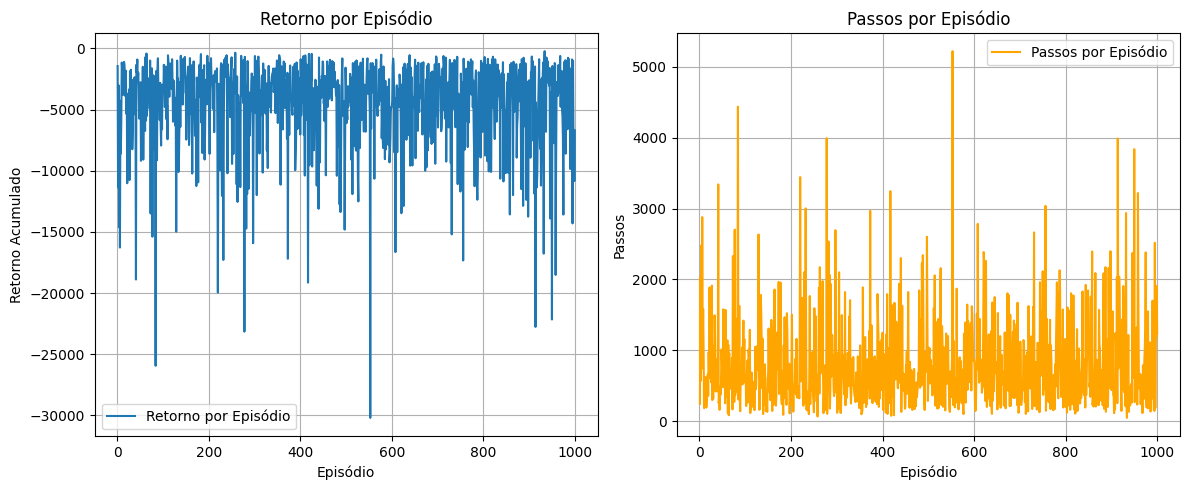

In [18]:
# Visualizar métricas

visualizar_metricas(metrics)

In [19]:
# Operação do agente no labirinto

estado = env.reset()
done = False
print("Agente explorando o labirinto...")
while not done:
    acao = np.argmax(q_table[estado[0], estado[1]])
    print(f"Estado: {estado}, Ação: {env.acoes[acao]}")
    estado, _, done = env.step(estado, env.acoes[acao])
print("O agente encontrou a saída!")

Agente explorando o labirinto...
Estado: (0, 0), Ação: direita
Estado: (0, 1), Ação: baixo
Estado: (1, 1), Ação: direita
Estado: (1, 2), Ação: baixo
Estado: (2, 2), Ação: baixo
Estado: (3, 2), Ação: direita
Estado: (3, 3), Ação: baixo
Estado: (4, 3), Ação: baixo
Estado: (5, 3), Ação: direita
Estado: (5, 4), Ação: baixo
Estado: (6, 4), Ação: direita
Estado: (6, 5), Ação: baixo
Estado: (7, 5), Ação: direita
Estado: (7, 6), Ação: baixo
Estado: (8, 6), Ação: direita
Estado: (8, 7), Ação: direita
Estado: (8, 8), Ação: baixo
Estado: (9, 8), Ação: direita
O agente encontrou a saída!


___

## Atividade avalitativa
1. Tarefa: Modifique o tamanho do labirinto ou adicione mais obstáculos. Como isso afeta o desempenho do agente?
2. Discuta como os parâmetros abaixo influenciam na eficiência do treinamento do agente:
  1. Taxa de exploração (ϵ)
  2. Taxa de desconto de recompensa (γ)
  3. Taxa de aprendizado (α)
3. Qual é o impacto do número de episódios no aprendizado do agente?
4. O que acontece com os gráficos se aumentarmos os obstáculos ou o tamanho do labirinto?